In [1]:
#Bibliotecas externas
%matplotlib nbagg
from matplotlib import pyplot as plt, artist as art, patches as patches, animation
from mpl_toolkits.basemap import Basemap as Map
from matplotlib.path import Path 
from datetime import datetime
import matplotlib as mpl
import pandas as pd
import numpy as np

In [2]:
# Manejo de datos.
sismos = pd.read_html('sismos.xls', header=9)
sismos = sismos[0]
sismos = sismos.rename(columns={'Fecha aaaa/mm/dd':'Fecha', 
                                'Hora UTChh:mm:ss':'Hora',                      
                                'LatitudGrados':'qlat',
                                'LongitudGrados':'qlon',
                                'ProfundidadKm':'qdepth',
                                'MagnitudMl':'Ml',
                                'MagnitudMw':'Mw'})

In [3]:
# Se organizan los sismos por fechas.
fechas=[]
years=[]
meses=[]
for i in range(len(sismos)):
    fecha = sismos['Fecha'][i]+' '+sismos['Hora'][i]
    fechas.append(datetime.strptime(fecha,"%Y-%m-%d %H:%M:%S"))
    years.append(fechas[-1].year)
    meses.append(fechas[-1].month)

sismos['fechas']=fechas
sismos['years']=years
sismos['mes']=meses

In [4]:
# Numero minimo y maximo de:
# Magnitud
nmin = sismos.Ml.min()
nmax = sismos.Ml.max()

# Longitud
xmin = sismos.qlon.min()
xmax = sismos.qlon.max()

# Latitud
ymin = sismos.qlat.min()
ymax = sismos.qlat.max()

# Profundidad
pmin = sismos.qdepth.min()
pmax = sismos.qdepth.max()

In [5]:
#Mapa unitario
def x2u(x,a,b):
    u=(x-a)/(1.0*(b-a))
    return u
def u2x(u,a,b):
    x=u*(b-a)+a
    return x

<IPython.core.display.Javascript object>


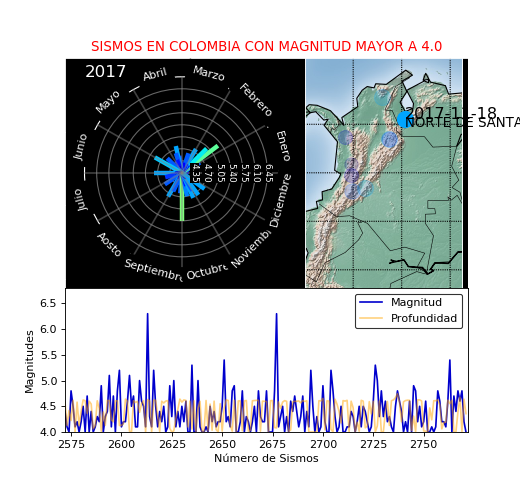

In [6]:
fig=plt.figure(figsize=(6.5,6))

#Hoja de estilos
plt.style.use('dark_background')
plt.title("SISMOS EN COLOMBIA CON MAGNITUD MAYOR A 4.0", color='red')

# Espacio de graficacion.
ax1=fig.add_axes([0.125, 0.4, 0.45, 0.48])
ax2=fig.add_axes([0.575, 0.4, 0.325, 0.48])
ax3=fig.add_axes([0.125, 0.1, 0.775, 0.3])

# Grafica 1

In [7]:
#Definimos los límites
ax1.set_xlim((-1.2,1.2))
ax1.set_ylim((-1.2,1.2))
ax1.set_axis_off()

#Circulo exterior
circulo=patches.Circle((0,0),radius=1)
circulo.set_edgecolor('white')
circulo.set_facecolor('none')
ax1.add_patch(circulo)

#Divisiones radiales
n = 7
for i in range(n):    
    r=(i+1)/(n+1)
    divisiones = patches.Circle((0,0),radius=r)
    divisiones.set_edgecolor('white')
    divisiones.set_facecolor('none')
    divisiones.set_alpha(0.4)
    ax1.add_patch(divisiones)
    #Marcas sobre las divisiones radiales
    ax1.text(r,0,"%.2f"%u2x(r,nmin,nmax),
            ha='center',va='center',
            bbox=dict(facecolor='k',edgecolor='none',pad=0),
            rotation=-90,
            fontsize=8, )

# Lineas de division y Etiquetas de meses.
Meses = ['Enero', 'Febrero', 'Marzo', 'Abril',
        'Mayo', 'Junio', 'Julio', 'Aosto',
        'Septiembre', 'Octubre', 'Noviembre',
        'Diciembre']
fac=1.06
dB=30
for i in range(12):
    B=i*dB
    #Lineas
    x,y = np.cos(B*np.pi/180), np.sin(B*np.pi/180)
    linea=mpl.lines.Line2D([0,x], [0,y], color='gray', alpha=0.5)
    ax1.add_line(linea)
    #Etiquetas
    ts=B+dB/2
    if B<=180:
        tt=ts-90
    else:
        tt=ts+90
    ts=ts*np.pi/180
    x,y = np.cos(ts), np.sin(ts)
    ax1.text(fac*x,fac*y,"%s"%Meses[i],
            ha='center',va='center',rotation =tt, 
            bbox = dict(facecolor='k',edgecolor='none',pad=5))

# Grafica 2

In [8]:
mapa = Map(ax=ax2, projection='cyl',
           llcrnrlon=-80.,llcrnrlat=-5.5,
            urcrnrlon=-67,urcrnrlat=13.5)

mapa.drawparallels(np.arange(-12, 12, 4),labels=[0,0,0,0], alpha=0.4)
mapa.drawmeridians(np.arange(-80, 80, 4),labels=[0,0,0,0], alpha=0.4)

mapa.shadedrelief()
mapa.drawcoastlines()
mapa.drawcountries()

/home/eilin-luna/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/eilin-luna/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


# Grafica 3

In [9]:
ax3.set_xlim((0,200))
ax3.set_ylim((nmin,nmax))
ax3.patch.set_color('w')
ax3.spines['bottom'].set_color('k')
ax3.spines['top'].set_color('k')
ax3.spines['right'].set_color('k')
ax3.spines['left'].set_color('k')
ax3.tick_params(axis='x', colors='k')
ax3.tick_params(axis='y', colors='k')

# Animaciones

In [10]:
#Objetos que se van a actualizar
texto=ax1.text(-1,1,'', fontsize=15)

punto,=ax2.plot([],[])
dia = ax2.text(0,0,'', color='k')
depart = ax2.text(0,0,'', color='k')

mags,=ax3.plot([],[], color='mediumblue', label='Magnitud')
profs,=ax3.plot([],[], color='orange', alpha=0.5, label='Profundidad')
leg = ax3.legend(loc=1, facecolor='w', edgecolor='k')
leg.get_texts()[0].set_color('k')
leg.get_texts()[1].set_color('k')

#Inicializacion
def init():
    ax3.set_xlabel("Número de Sismos", color='k')
    ax3.set_ylabel("Magnitudes", color='k')

#Animacion
cmap=plt.get_cmap("jet")
def animacion(iframe):  
    # Datos a utilizar.
    year = sismos.fechas[iframe].year  # Anio sismo.
    mes = sismos.fechas[iframe].month  # Mes sismo.
    long = sismos.qlon[iframe] # Longitud sismo
    lat = sismos.qlat[iframe] # Latitud sismo
    mag = sismos.Ml[iframe]  # Magnitud sismo.
    fecha = sismos.Fecha[iframe] # Fechas sismo.
    dep = sismos.Departamento[iframe] #Depart. sismo.
    
    # Color dependiente de la manitud
    valor_color=x2u(mag, nmin, nmax)
    color=cmap(valor_color)
    
    # Actualiza objetos.
    texto.set_text(str(year))
    
    dia.set_text(fecha)
    dia.set_position([long,lat])
    dia.set_fontsize(mag*3)
    
    depart.set_text(dep)
    depart.set_position([long,lat-0.7])
    depart.set_fontsize(mag*2.5)
    
    punto.set_data(long,lat)
    punto.set_color(color)
    punto.set_marker('o')
    punto.set_markersize(mag*3)
    
    # Animacion: Grafica 3 ---------------------------------
    X = range(len(sismos))
    prof = sismos.qdepth.values*(nmax-nmin)/(pmax-pmin)+nmin
    profs.set_data(X[:iframe],prof[:iframe])
    
    M = sismos.Ml.values
    mags.set_data(X[:iframe],M[:iframe])
    
    # Animacion Grafica 1 ----------------------------------
    # Cantidad de sismos en un mes.
    Years = sismos[sismos.years==year]
    Meses = Years[Years.mes==mes]
    N = len(Meses)
    
    # Creacion de barras.
    index_meses = Meses.index.values
    i = list(index_meses).index(iframe)
    teta = 30*(mes-1) + i*30/N
    radio=x2u(mag,nmin,nmax)
    x=radio*np.cos(teta*np.pi/180.)
    y=radio*np.sin(teta*np.pi/180.)
    barra=Path([(0,0),(x,y)],[Path.MOVETO, Path.LINETO])
    patch=patches.PathPatch(barra,facecolor='none', edgecolor=color, lw=4)
    ax1.add_patch(patch)
    
    # Datos persistentes.
    long, lat = mapa(long, lat)
    mapa.plot(long,lat,'o', ms=mag*3, color=color,alpha=0.2)
    
    #Borramos los datos mas viejos
    if iframe!=0:
        year_new=year
        year_old=sismos.fechas[sismos.index[iframe-1]].year
        if year_new!=year_old:
            ax1.patches=ax1.patches[:9]
            
    nlines=len(ax2.lines)
    if nlines>18:ax2.lines[12].remove()
        
    if iframe>200: ax3.set_xlim((iframe-200,iframe))
    
nframes=len(sismos)
anim=animation.FuncAnimation(fig,animacion,frames=nframes,init_func=init,repeat=False)

In [11]:
anim.save('Proyecto.gif', dpi=60, writer='imagemagick')

/home/eilin-luna/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/eilin-luna/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
